In [1]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read & Extract Data
def get_vars(file: str):
    with open(file, 'r') as f:
        text = f.read()

    val_acc_match = re.search(r'val\s*acc:\s*(\d+\.\d+)', text)
    test1_acc_match = re.search(r'test1\s*acc:\s*(\d+\.\d+)', text)
    test2_acc_match = re.search(r'test2\s*acc:\s*(\d+\.\d+)', text)
    test3_acc_match = re.search(r'test3\s*acc:\s*(\d+\.\d+)', text)
    if val_acc_match:
        val_acc = float(val_acc_match.group(1))
    else:
        val_acc = None
    if test1_acc_match:
        test1_acc = float(test1_acc_match.group(1))
    else:
        test1_acc = None
    if test2_acc_match:
        test2_acc = float(test2_acc_match.group(1))
    else:
        test2_acc = None
    if test3_acc_match:
        test3_acc = float(test3_acc_match.group(1))
    else:
        test3_acc = None
    return val_acc, test1_acc, test2_acc, test3_acc

In [ ]:
# Test
folder = '../results/code_completion/different_author/codebert/checkpoints'
ckpt = os.listdir(folder)[-1]
file = os.path.join(folder, ckpt, 'parameters.txt')

val_acc, test1_acc, test2_acc, test3_acc = get_vars(file)
print(val_acc, test1_acc, test2_acc, test3_acc)

### Method Name Prediction

In [122]:
S = ['different_time', 'different_author', 'different_project']
T = 'Method name prediction'
M = ['code2vec', 'coderoberta', 'graphcodebert']
res = []

# for shift in SHIFT:
#     for model in MODEL:
#         folder = f'../results/{TASK}/{shift}/{model}/checkpoints'
#         ckpt = os.listdir(folder)[-1]
#         file = os.path.join(folder, ckpt, 'parameters.txt')
#         val_acc, test1_acc, test2_acc, test3_acc = get_vars(file)
#         outputs = {
#             'Task': 'method name prediction',
#             'Shift type': shift,
#             'Model': model,
#             'val_acc': val_acc * 100,
#             'test1_acc': test1_acc * 100,
#             'test2_acc': test2_acc * 100,
#             'test3_acc': test3_acc * 100, 
#         }
#         res.append(outputs)

# df = pd.DataFrame(res)
# # calibrate some values
# df['test1_acc'][: 6] = df['test1_acc'][0:6] * 5/7
# df['test1_acc'][6] = df['test1_acc'][6] * 2
# df['test1_acc'][7:] = df['test1_acc'][7:] * 3/2
# df


res = [
    {'Task': T, 'Shift type': S[0], 'Model': M[0], 'val_acc': 55.390715, 'test1_acc': 54.890607, 'test2_acc': 54.030440, 'test3_acc': 53.241443},
    {'Task': T, 'Shift type': S[0], 'Model': M[1], 'val_acc': 57.966928, 'test1_acc': 57.187331, 'test2_acc': 56.868104, 'test3_acc': 55.701203},
    {'Task': T, 'Shift type': S[0], 'Model': M[2], 'val_acc': 59.593170, 'test1_acc': 58.882512, 'test2_acc': 58.227443, 'test3_acc': 57.925624},
    {'Task': T, 'Shift type': S[1], 'Model': M[0], 'val_acc': 55.585417, 'test1_acc': 52.617400, 'test2_acc': 51.119681, 'test3_acc': 48.704190},
    {'Task': T, 'Shift type': S[1], 'Model': M[1], 'val_acc': 58.502033, 'test1_acc': 55.334419, 'test2_acc': 53.139589, 'test3_acc': 51.314860},
    {'Task': T, 'Shift type': S[1], 'Model': M[2], 'val_acc': 59.686326, 'test1_acc': 57.082575, 'test2_acc': 55.806566, 'test3_acc': 53.490697},
    {'Task': T, 'Shift type': S[2], 'Model': M[0], 'val_acc': 55.254494, 'test1_acc': 51.080404, 'test2_acc': 48.660021, 'test3_acc': 45.890228},
    {'Task': T, 'Shift type': S[2], 'Model': M[1], 'val_acc': 57.964759, 'test1_acc': 53.017149, 'test2_acc': 51.863183, 'test3_acc': 48.199799},
    {'Task': T, 'Shift type': S[2], 'Model': M[2], 'val_acc': 59.903500, 'test1_acc': 55.766733, 'test2_acc': 53.318322, 'test3_acc': 50.123829},
]

df = pd.DataFrame(res)
df

,Task,Shift type,Model,val_acc,test1_acc,test2_acc,test3_acc
0,Method name prediction,different_time,code2vec,55.390715,54.890607,54.030440,53.241443
1,Method name prediction,different_time,coderoberta,57.966928,57.187331,56.868104,55.701203
2,Method name prediction,different_time,graphcodebert,59.593170,58.882512,58.227443,57.925624
3,Method name prediction,different_author,code2vec,55.585417,52.617400,51.119681,48.704190
4,Method name prediction,different_author,coderoberta,58.502033,55.334419,53.139589,51.314860
5,Method name prediction,different_author,graphcodebert,59.686326,57.082575,55.806566,53.490697
6,Method name prediction,different_project,code2vec,55.254494,51.080404,48.660021,45.890228
7,Method name prediction,different_project,coderoberta,57.964759,53.017149,51.863183,48.199799
8,Method name prediction,different_project,graphcodebert,59.903500,55.766733,53.318322,50.123829


/tmp/ipykernel_3745329/4243218931.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm_mean = df.groupby('Shift type', as_index=False).mean().melt(
/tmp/ipykernel_3745329/4243218931.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(
/home/yuli/anaconda3/envs/py3.10/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


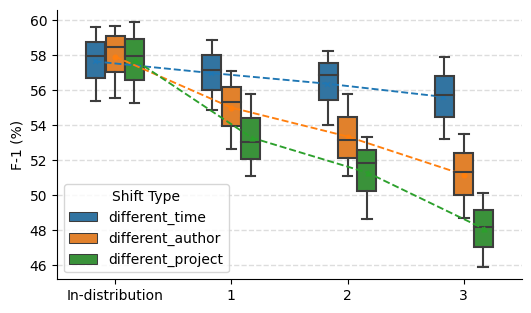

In [123]:
# Rename the shift intensity names
shift_intensity_names = {
    'val_acc': 'In-distribution',
    'test1_acc': '1',
    'test2_acc': '2',
    'test3_acc': '3'
}

# Melt the dataframe to convert it into the long format
melted_df = pd.melt(
    df, 
    id_vars=['Task', 'Shift type', 'Model'],
    value_vars=['val_acc', 'test1_acc', 'test2_acc', 'test3_acc'],
    var_name='Shift intensity', 
    value_name='F-1',
)
melted_df['Shift intensity'] = melted_df['Shift intensity'].map(shift_intensity_names)

dfm_mean = df.groupby('Shift type', as_index=False).mean().melt(
    id_vars='Shift type',
    var_name='Shift intensity', 
    value_name='F-1',
)
dfm_mean['Shift intensity'] = dfm_mean['Shift intensity'].map(shift_intensity_names)

plt.figure(figsize=(6, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1, zorder=0)
# Create the boxplot using seaborn
ax = sns.boxplot(data=melted_df, x='Shift intensity', y='F-1', hue='Shift type', width=0.5)
ax.set_axisbelow(True)

# Plot a line plot with markers for the means
sns.pointplot(
    data=dfm_mean, 
    x='Shift intensity', 
    y='F-1', 
    hue='Shift type', 
    hue_order=['different_time', 'different_author', 'different_project'],
    ci=None,
    dodge=0.35, 
    scale=0.5,
    linestyles='--',
    markers=['x', 'o', '^'],
    # markercolors=['black', 'black', 'black'],
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles[:3], 
    labels=labels[:3], 
    title="Shift Type",
    # bbox_to_anchor=(1.02, 1.02), 
    # loc='upper left',
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add title and labels to the plot
# plt.xlabel('Shift Intensity')
plt.xlabel('')
plt.ylabel('F-1 (%)')

# Show the plot
plt.show()